<a href="https://colab.research.google.com/github/ghazalna/Falcon9-Landing-Predictor/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

In [2]:
uploaded=files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('preprocessed_dataset.csv')

In [5]:
df

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Class,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,6123.547647,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,525.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,677.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,500.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3170.000000,1,0,0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,15600.000000,2,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0
86,15600.000000,3,1,1,1,5.0,13,1,0,0,...,0,0,0,0,0,0,1,0,0,0
87,15600.000000,6,1,1,1,5.0,12,1,0,0,...,0,0,0,1,0,0,0,0,0,0
88,15600.000000,3,1,1,1,5.0,12,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 88 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PayloadMass                          90 non-null     float64
 1   Flights                              90 non-null     int64  
 2   GridFins                             90 non-null     int64  
 3   Reused                               90 non-null     int64  
 4   Legs                                 90 non-null     int64  
 5   Block                                90 non-null     float64
 6   ReusedCount                          90 non-null     int64  
 7   Class                                90 non-null     int64  
 8   Orbit_ES-L1                          90 non-null     int64  
 9   Orbit_GEO                            90 non-null     int64  
 10  Orbit_GTO                            90 non-null     int64  
 11  Orbit_HEO                         

### **Machine Learning Prediction**

In [7]:
X= df.drop('Class', axis=1)
y= df['Class']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20 ,random_state=101)

In [10]:
y_test.shape

(18,)

### **Random** **Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rfc = RandomForestClassifier()

In [13]:
rfc.fit(X_train , y_train)

RandomForestClassifier()

In [14]:
rfc_pred = rfc.predict(X_test)

In [15]:
rfc_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [19]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test,rfc_pred))

[[ 5  2]
 [ 1 10]]


In [20]:
from sklearn.metrics import accuracy_score
raw_accuracy = accuracy_score(y_test, rfc_pred, normalize=False)
print("Accuracy (raw count): ", raw_accuracy)

Accuracy (raw count):  15


In [21]:
normalized_accuracy = accuracy_score(y_test, rfc_pred, normalize=True)
print("Accuracy (normalized): ", normalized_accuracy)

Accuracy (normalized):  0.8333333333333334


In [23]:
from sklearn.metrics import classification_report
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.83      0.91      0.87        11

    accuracy                           0.83        18
   macro avg       0.83      0.81      0.82        18
weighted avg       0.83      0.83      0.83        18



In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

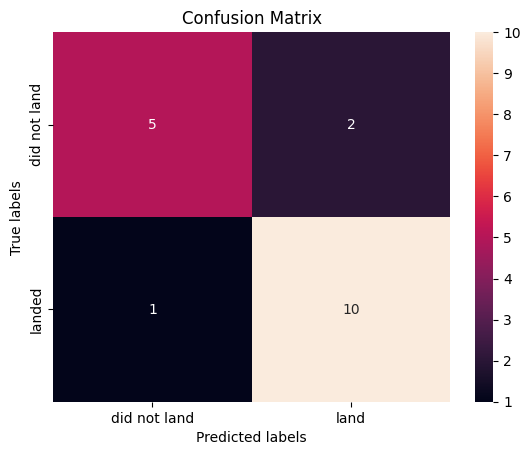

In [27]:
yhat=rfc.predict(X_test)
plot_confusion_matrix(y_test,yhat)